In this notebook I try to make the various steps of this project using pyvista, netCDF4...

Current env: `pyvista_NEW`

Steps:

1. Loading the dataset. (netCDF4) 
2. 

In [103]:
import pyvista as pv
import numpy as np
import netCDF4 as nc
import vtk
import matplotlib.pyplot as plt
import gemgis as gg

In [104]:
#Environment Report for Reproducibilty

## Just some useful debugging info if you have any issues
pv.Report(["netCDF4", "tqdm"])

--------------------------------------------------------------------------------
  Date: Wed Dec 28 17:12:32 2022 CET

                OS : Linux
            CPU(s) : 4
           Machine : x86_64
      Architecture : 64bit
               RAM : 15.5 GiB
       Environment : Jupyter
       File system : ext4
        GPU Vendor : Intel
      GPU Renderer : Mesa Intel(R) HD Graphics 620 (KBL GT2)
       GPU Version : 4.6 (Core Profile) Mesa 22.0.5

  Python 3.11.0 | packaged by conda-forge | (main, Oct 25 2022, 06:24:40) [GCC
  10.4.0]

           netCDF4 : 1.6.2
              tqdm : 4.64.1
           pyvista : 0.37.0
               vtk : 9.2.2
             numpy : 1.24.0
           imageio : 2.23.0
            scooby : 0.7.0
             pooch : v1.6.0
        matplotlib : 3.6.2
           IPython : 8.7.0
          colorcet : 3.0.1
           cmocean : 2.0
             scipy : 1.9.3
        jupyterlab : 3.5.2
--------------------------------------------------------------------------------

## Load/explore the dataset
with netCDF4

In [124]:
ds = nc.Dataset("UFZ_RemoteSensing/HOLAPS-H-JJA_anomaly-d-2001-2005.nc")
print(ds.variables.keys())

dict_keys(['time', 'longitude', 'latitude', 'surface_upward_sensible_heat_flux'])


In [125]:
keys = ['time', 'longitude', 'latitude', 'surface_upward_sensible_heat_flux']

In [126]:
## Print dimensions:
for dim in ds.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 460
<class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 1233
<class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 601


In [139]:
## get time, longitude, latitue datasets (all are 1D + metadata):
time = ds[keys[0]]     ## array holding the timestamps
lon = ds[keys[1]]     ## array holding the longitude positions on the world map
lat = ds[keys[2]]     ## array holding the latitude positions on the world map

## 3D - lon, lat, time
heat = ds[keys[3]]     ## the actual heat flux data matrix


In [140]:
## Print metadata:
print(time)
print('*'*80)
print(lon)
print('*'*80)
print(lat)
print('*'*80)
print(heat)
print('*'*80)

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    units: day as %Y%m%d.%f
    calendar: proleptic_gregorian
    axis: T
unlimited dimensions: time
current shape = (460,)
filling on, default _FillValue of 9.969209968386869e+36 used
********************************************************************************
<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
unlimited dimensions: 
current shape = (1233,)
filling on, default _FillValue of 9.969209968386869e+36 used
********************************************************************************
<class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
unlimited dimensions: 
current shape = (601,)
filling on, default _FillValue of 9.969209968386869e+36 used
****************************************************

In [276]:
## Get bounds lon, lat
bounds = [np.min(lat).item(), np.max(lat).item(), 
          np.min(lon).item(), np.max(lon).item(),]
print(bounds)

[30.0, 60.0, -15.0, 46.969600677490234]


In [337]:
a = heat[0]
min_val = np.min(a)
a = a.filled(fill_value=-999)
a.shape, min_val

((601, 1233), -111.63459)

In [338]:
grid = gg.visualization.create_dem_3d(dem=a, extent=[0,1233,0,601])

In [363]:
clipped = grid.threshold(-200, invert=False, preference='point', all_scalars=True)

In [364]:
#clipped = grid.clip_scalar(value=min_val-1, invert=False)

In [365]:
clipped.cell_points(1)

array([[ 89., 441.,   7.],
       [ 89., 442.,   1.],
       [ 90., 442.,  14.],
       [ 90., 441.,  14.]])

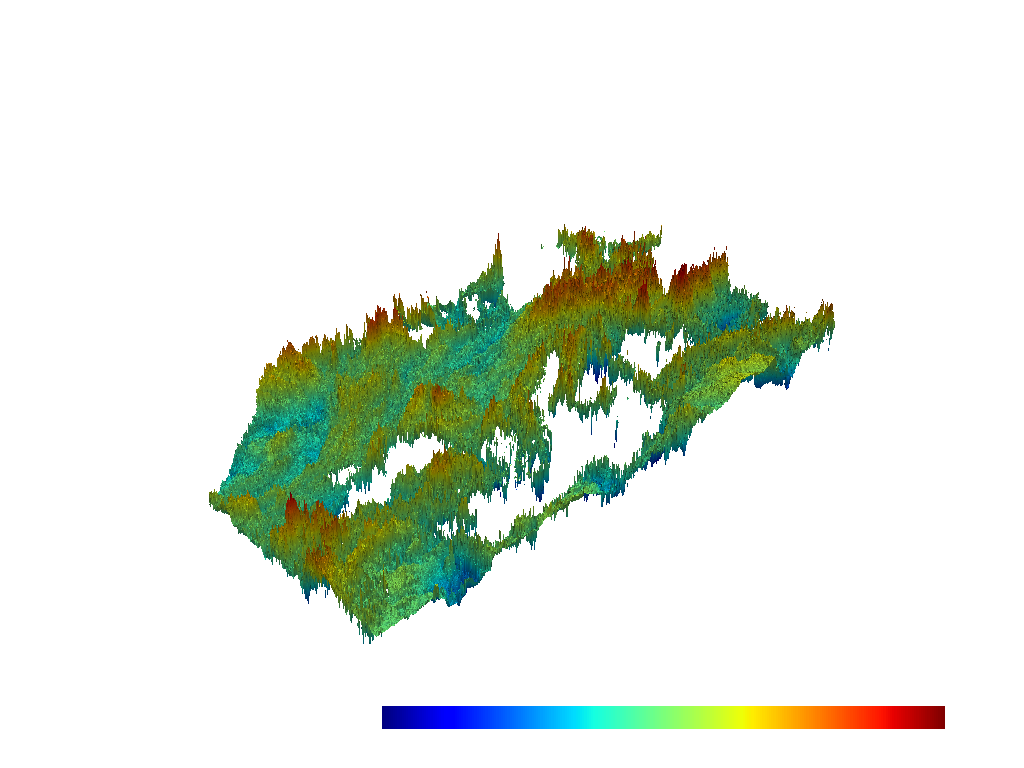

In [376]:
p = pv.Plotter()

p.add_mesh(mesh=clipped, cmap='jet')
###, scalars=grid["Elevation"], cmap='gist_earth')


# p.camera_position =[(-283.285811675846, -1597.1397046051004, 1155.542325449192),
#                     (577.9371599370799, 495.3480261506809, 381.7124055285182),
#                     (0.17313457304419916, 0.27814381639313923, 0.9448070898437746)]

#p.show_grid(color='black')
p.set_background(color='white')
p.show()

In [368]:
import rasterio

In [369]:
dem = rasterio.open('netcdf:UFZ_RemoteSensing/HOLAPS-H-JJA_anomaly-d-2001-2005.nc:surface_upward_sensible_heat_flux')

In [370]:
dem.read(1)

array([[-9.9999990e+06, -9.9999990e+06, -9.9999990e+06, ...,
        -9.9999990e+06, -9.9999990e+06, -9.9999990e+06],
       [-9.9999990e+06, -9.9999990e+06, -9.9999990e+06, ...,
        -9.9999990e+06, -9.9999990e+06, -9.9999990e+06],
       [-9.9999990e+06, -9.9999990e+06, -9.9999990e+06, ...,
        -9.9999990e+06, -9.9999990e+06, -9.9999990e+06],
       ...,
       [-9.9999990e+06, -9.9999990e+06, -9.9999990e+06, ...,
         2.4079470e-01, -1.2170360e+00,  1.6800808e+00],
       [-9.9999990e+06, -9.9999990e+06, -9.9999990e+06, ...,
         5.3102654e-01, -9.0459257e-02,  2.2599394e+00],
       [-9.9999990e+06, -9.9999990e+06, -9.9999990e+06, ...,
        -5.2256918e-01, -4.2925283e-01, -9.3360889e-01]], dtype=float32)

In [371]:
grid = gg.visualization.create_dem_3d(dem=dem.read(1), extent=[0,1233,0,601])

/home/ella/miniconda3/envs/pyvista/lib/python3.11/site-packages/pyvista/utilities/helpers.py:507: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


In [225]:
grid.cell_points(1)

array([[ 0.000000e+00,  1.000000e+00, -9.999999e+06],
       [ 0.000000e+00,  2.000000e+00, -9.999999e+06],
       [ 1.000000e+00,  2.000000e+00, -9.999999e+06],
       [ 1.000000e+00,  1.000000e+00, -9.999999e+06]])

In [372]:
clipped = grid.threshold(-200, invert=False, preference='point', all_scalars=True)

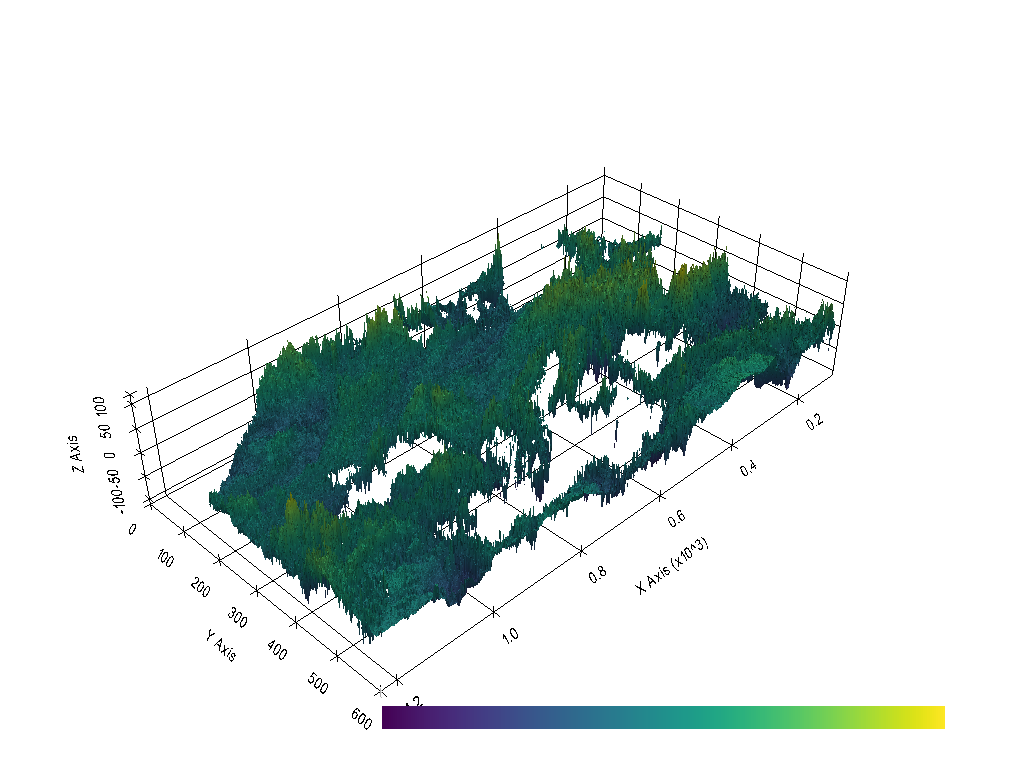

In [373]:
p = pv.Plotter()

p.add_mesh(mesh=clipped)
###, scalars=grid["Elevation"], cmap='gist_earth')

p.show_grid(color='black')
p.set_background(color='white')
p.show()

Object `add_mesh` not found.
